In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Amazon Sale Report.csv\Amazon Sale Report.csv")

C:\Users\ATOnile\AppData\Local\Temp\ipykernel_10848\3149940761.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Amazon Sale Report.csv\Amazon Sale Report.csv")


In [5]:
df.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [19]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [7]:
df['Courier Status'].fillna(method = 'bfill',inplace = True)

In [9]:
df['currency'].ffill(inplace = True)

In [11]:
df['Amount'].interpolate(method = 'linear', inplace = True)

In [13]:
df['ship-city'].ffill(inplace = True)

In [15]:
df['ship-state'].bfill(inplace = True)

In [17]:
df['ship-postal-code'].interpolate(method = 'linear', inplace = True)

In [19]:
df['ship-country'].ffill(inplace = True)

In [23]:
df['promotion-ids'].fillna(method = 'bfill', inplace = True )

In [25]:
df['fulfilled-by'].ffill(inplace = True)

In [27]:
df['Unnamed: 22'].fillna(0 ,inplace=True)

In [29]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [31]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [33]:
cor_numeric_values = df.select_dtypes(include = ['int64', 'float64'])
print(cor_numeric_values)

         index  Qty   Amount  ship-postal-code
0            0    0   647.62          400081.0
1            1    1   406.00          560085.0
2            2    1   329.00          410210.0
3            3    0   753.33          605008.0
4            4    1   574.00          600073.0
...        ...  ...      ...               ...
128970  128970    1   517.00          500013.0
128971  128971    1   999.00          122004.0
128972  128972    1   690.00          500049.0
128973  128973    1  1199.00          389350.0
128974  128974    1   696.00          492014.0

[128975 rows x 4 columns]


In [103]:
correlation_matrix = cor_numeric_values.corr()
print(correlation_matrix)

                     index       Qty    Amount  ship-postal-code
index             1.000000  0.005375 -0.019548          0.012029
Qty               0.005375  1.000000  0.036354         -0.007238
Amount           -0.019548  0.036354  1.000000         -0.031096
ship-postal-code  0.012029 -0.007238 -0.031096          1.000000


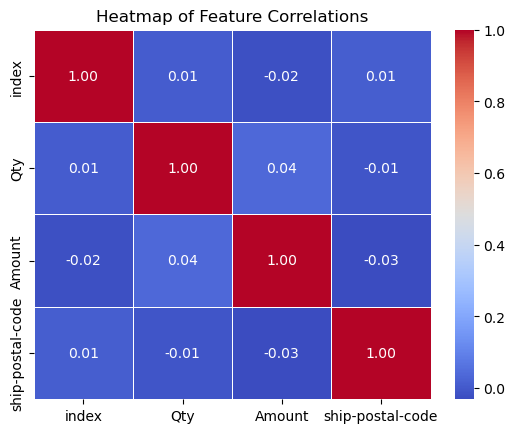

In [119]:
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# week-2_TASK-2

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.set_index('Date', inplace = True)

In [39]:
df['Sales Channel '].value_counts()

Sales Channel 
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

In [67]:
# Data frequency check karna (cleaned data ke liye)
print(df.index.to_series().diff().value_counts())

Date
0 days     128882
-1 days        90
61 days         1
60 days         1
Name: count, dtype: int64


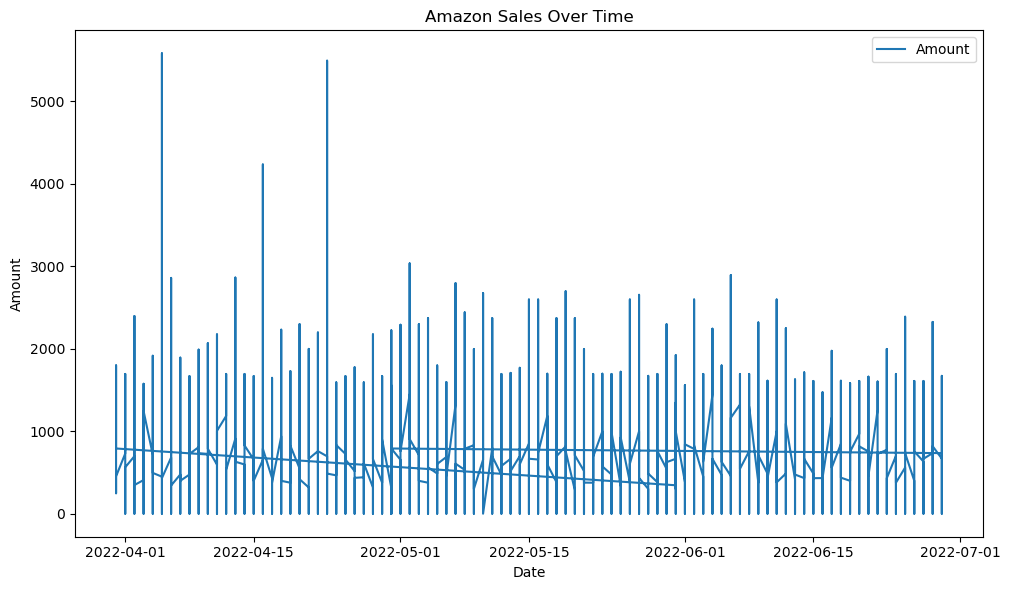

In [116]:
# Original time series plot karna
plt.figure(figsize=(12, 6))
plt.plot(df['Amount'], label='Amount')
plt.title('Amazon Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [82]:
decomposition = seasonal_decompose(df['Amount'], model = 'additive', period = 12)

In [84]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

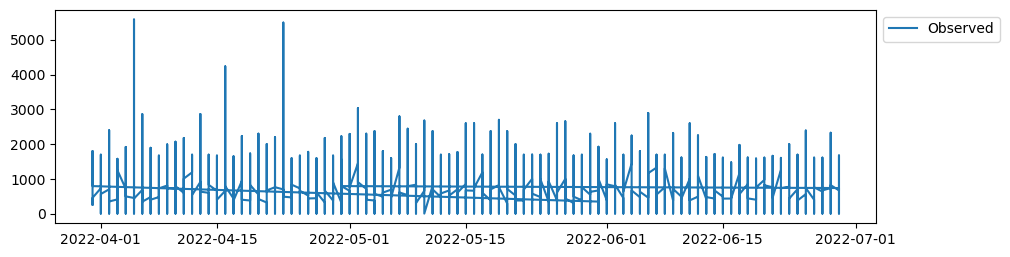

In [118]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

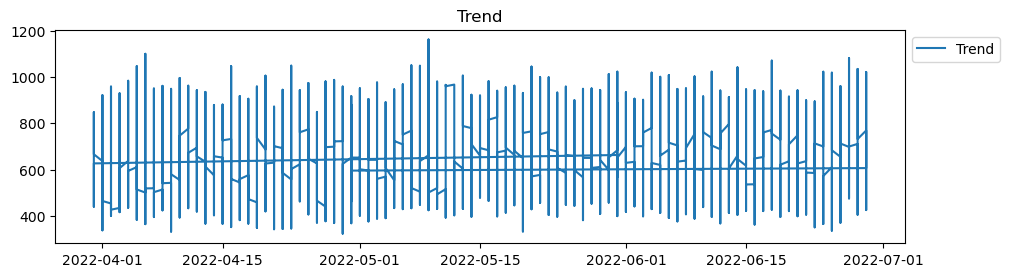

In [112]:
# Trend
plt.figure(figsize=(12, 10))
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

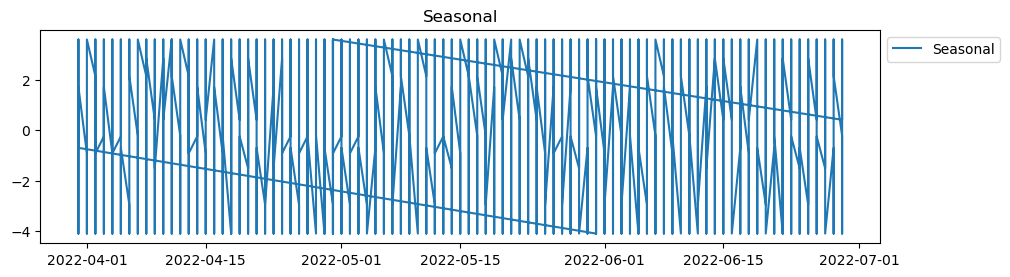

In [110]:
# Seasonal
plt.figure(figsize=(12, 10))
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

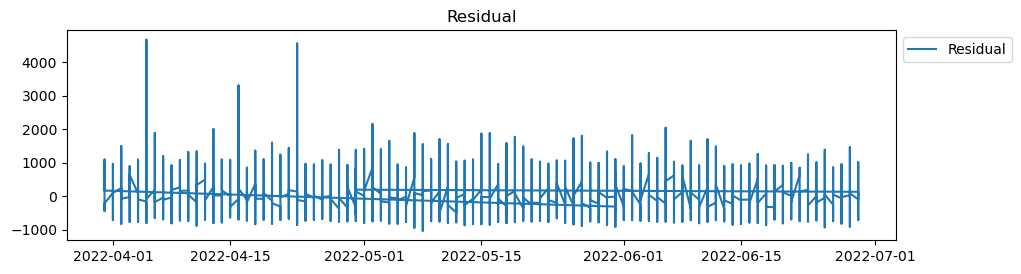

In [108]:
# Residual
plt.figure(figsize=(12, 10))
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

WEEK-2_TASK-3

to create box plots and violin plots

In [143]:
top_5 = df['Status'].value_counts()
print(top_5)


Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


In [158]:
top_5.head(5)

Status
Shipped                         77804
Shipped - Delivered to Buyer    28769
Cancelled                       18332
Shipped - Returned to Seller     1953
Shipped - Picked Up               973
Name: count, dtype: int64

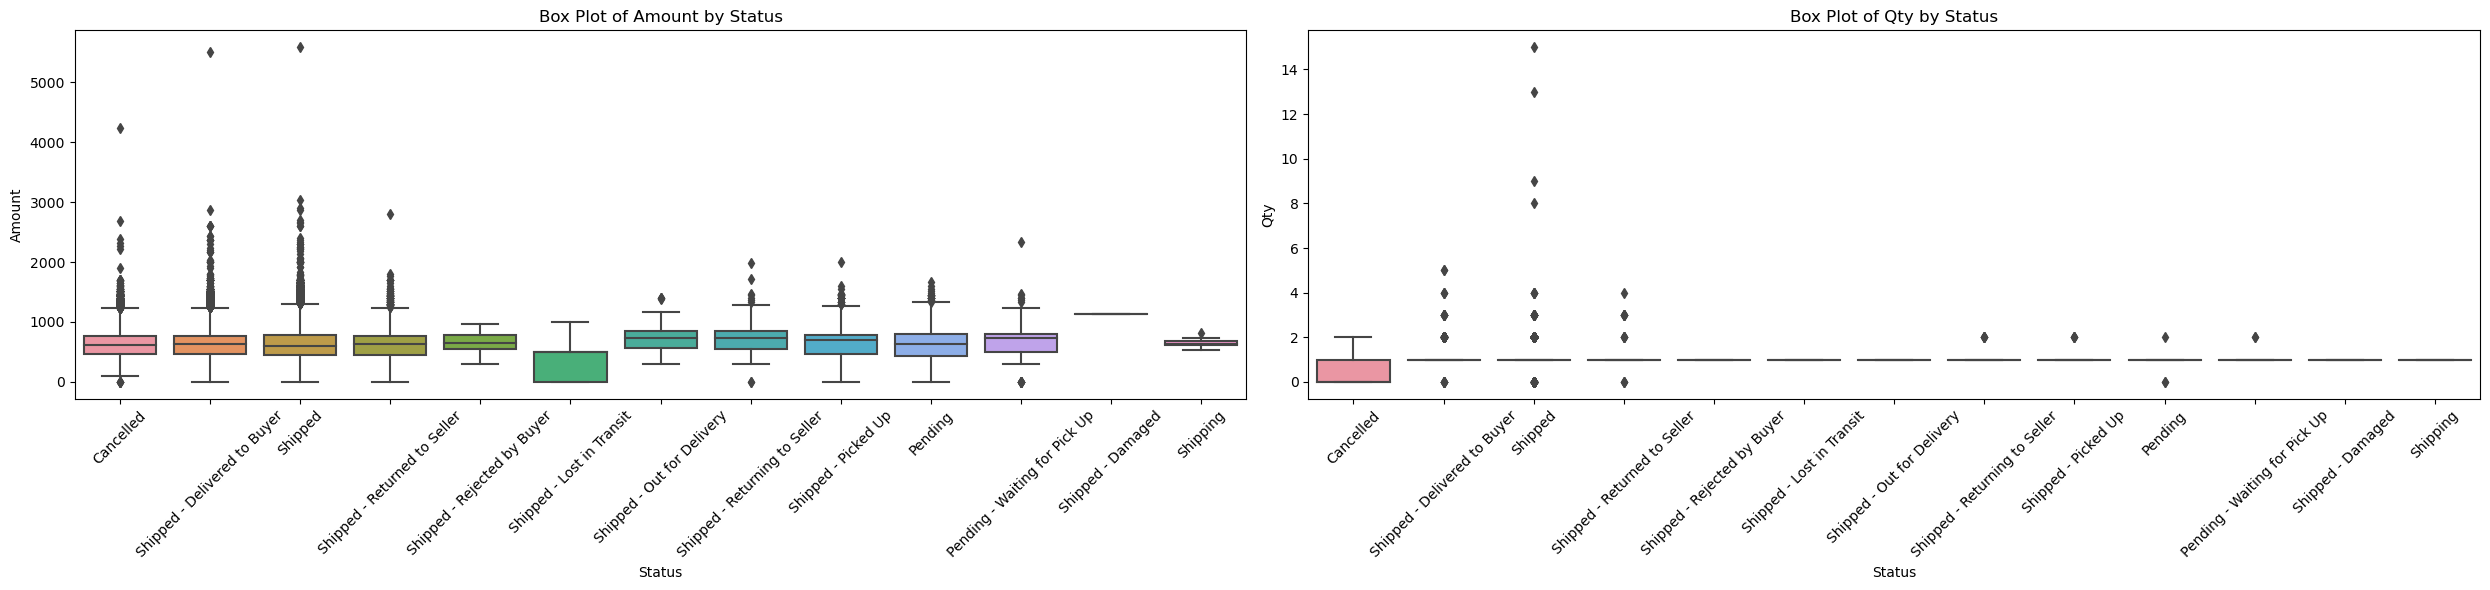

In [180]:
# Create box plots for multiple features
plt.figure(figsize=(25, 6))

# Box plot for Amount
plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Amount', data=df)
plt.title('Box Plot of Amount by Status')
plt.xticks(rotation=45)

# Box plot for Qty
plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Qty', data=df)
plt.title('Box Plot of Qty by Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

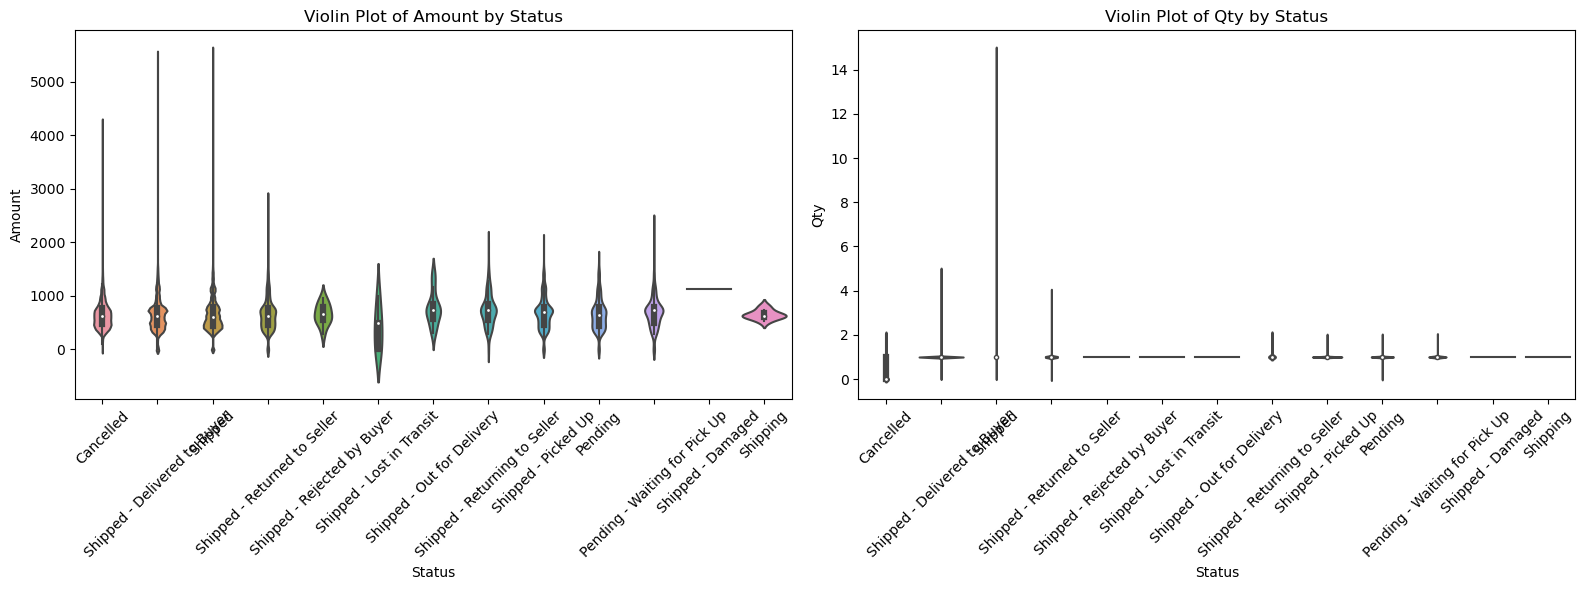

In [164]:
# Violin plot for Amount by Status
plt.subplot(1, 2, 1)
sns.violinplot(x='Status', y='Amount', data=df)
plt.title('Violin Plot of Amount by Status')
plt.xticks(rotation=45)

# Violin plot for Qty by Status
plt.subplot(1, 2, 2)
sns.violinplot(x='Status', y='Qty', data=df)
plt.title('Violin Plot of Qty by Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# WEEK-2_TASK-4

# k-mapping

In [27]:
k_map_data = df[['Amount','Qty']]


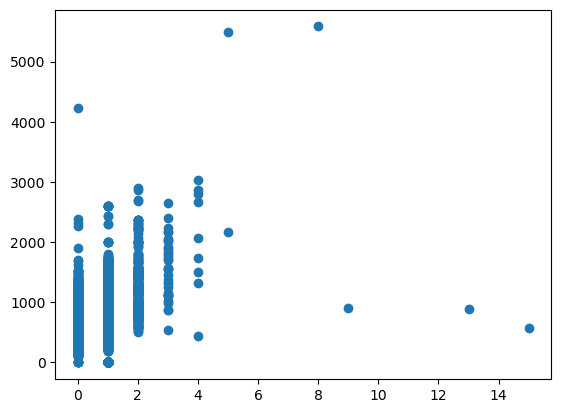

In [145]:
plt.scatter(df.Qty, df['Amount'])
plt.show()

In [94]:
kmeans = KMeans(n_clusters=3)
y_pridicted = kmeans.fit_predict(df[['Amount', 'Qty']])
y_pridicted

array([2, 0, 0, ..., 2, 1, 2])

In [102]:
df['cluster'] = y_pridicted
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Cluster,cluster
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,0,2
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,0,0
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,0,0
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,0,2
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,0,2


In [106]:
kmeans.cluster_centers_

array([[4.14570573e+02, 9.09058684e-01],
       [1.15498544e+03, 9.46405229e-01],
       [7.20602583e+02, 8.85393217e-01]])

In [108]:
# Create separate DataFrames for each cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

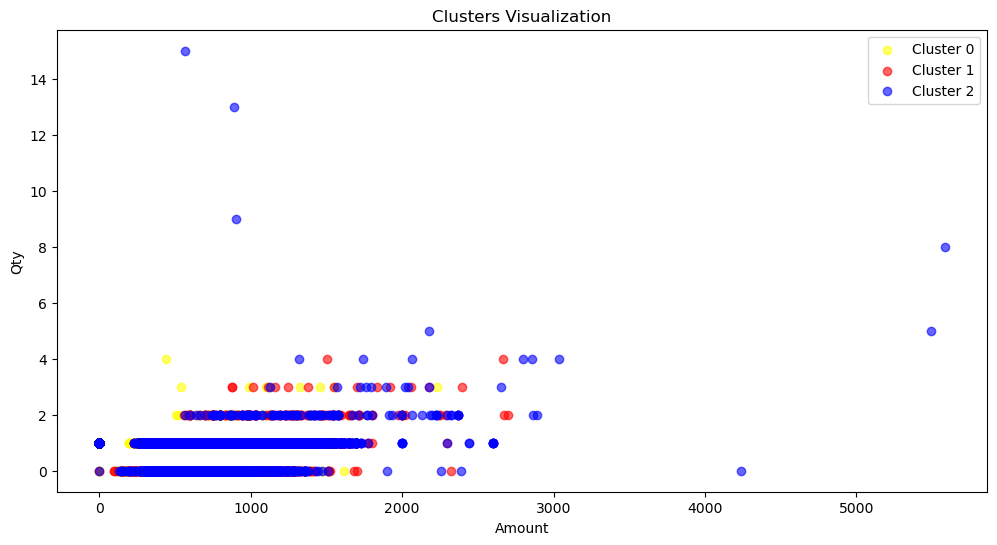

In [112]:
plt.figure(figsize=(12, 6))

# Plot for Cluster 0
plt.scatter(cluster_0['Amount'], cluster_0['Qty'], color='yellow', label='Cluster 0', alpha=0.6)

# Plot for Cluster 1
plt.scatter(cluster_1['Amount'], cluster_1['Qty'], color='red', label='Cluster 1', alpha=0.6)

# Plot for Cluster 2
plt.scatter(cluster_2['Amount'], cluster_2['Qty'], color='blue', label='Cluster 2', alpha=0.6)

plt.xlabel('Amount')
plt.ylabel('Qty')
plt.title('Clusters Visualization')
plt.legend()
plt.show()

In [157]:
scaler = MinMaxScaler()
# nomalize data using min max 
df[['Qty','Amount']]= scaler.fit_transform(df[['Qty','Amount']])
print(df[['Qty','Amount']])


             Qty    Amount
0       0.000000  0.115978
1       0.066667  0.072708
2       0.066667  0.058918
3       0.000000  0.134909
4       0.066667  0.102794
...          ...       ...
128970  0.066667  0.092586
128971  0.066667  0.178904
128972  0.066667  0.123567
128973  0.066667  0.214721
128974  0.066667  0.124642

[128975 rows x 2 columns]


In [155]:
kmeans = KMeans(n_clusters=3)
y_pridicted = kmeans.fit_predict(df[['Amount', 'Qty']])
y_pridicted

array([0, 1, 1, ..., 0, 2, 0])

In [159]:
df['cluster'] = y_pridicted
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Cluster,cluster
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,0,0
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,0,1
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,0,1
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,0,0
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,0,1


In [161]:
kmeans.cluster_centers_

array([[0.13068967, 0.05813647],
       [0.07533143, 0.06104134],
       [0.20820548, 0.06423168]])

In [163]:
# Create separate DataFrames for each cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

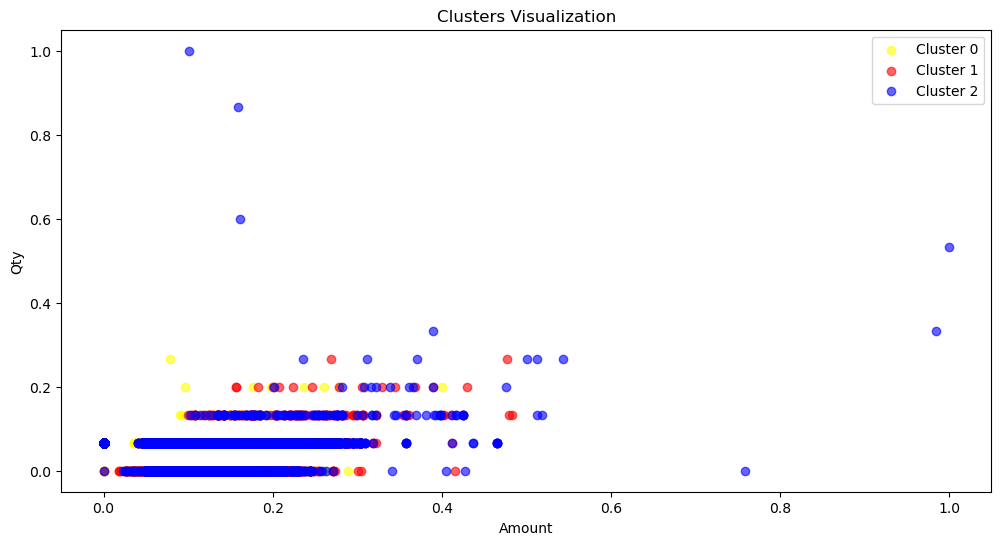

In [165]:
plt.figure(figsize=(12, 6))

# Plot for Cluster 0
plt.scatter(cluster_0['Amount'], cluster_0['Qty'], color='yellow', label='Cluster 0', alpha=0.6)

# Plot for Cluster 1
plt.scatter(cluster_1['Amount'], cluster_1['Qty'], color='red', label='Cluster 1', alpha=0.6)

# Plot for Cluster 2
plt.scatter(cluster_2['Amount'], cluster_2['Qty'], color='blue', label='Cluster 2', alpha=0.6)

plt.xlabel('Amount')
plt.ylabel('Qty')
plt.title('Clusters Visualization')
plt.legend()
plt.show()

In [169]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['Qty','Amount']])
    sse.append(kmeans.inertia_)

In [171]:
sse

[373.7819948358941,
 178.12028011325071,
 114.2679331774977,
 74.89191468365323,
 59.28420917922007,
 50.03752668715367,
 46.10047164041886,
 31.944667726094757,
 25.08161769683793]

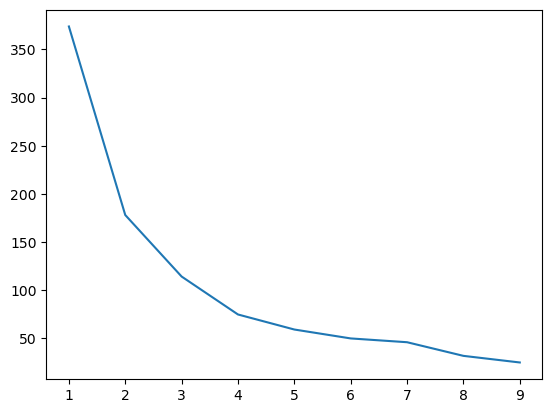

In [173]:
plt.plot(k_rng,sse)

# week_2_TASK-5

 # principal component anlaysis

In [45]:
PCA_feature = ['Qty','Amount']

In [47]:
PCA_feature

['Qty', 'Amount']

In [51]:
x = df[PCA_feature]
x

,Qty,Amount
Date,,
2022-04-30,0,647.62
2022-04-30,1,406.00
2022-04-30,1,329.00
2022-04-30,0,753.33
2022-04-30,1,574.00
...,...,...
2022-05-31,1,517.00
2022-05-31,1,999.00
2022-05-31,1,690.00


In [53]:
y = df['Category']
y

Date
2022-04-30              Set
2022-04-30            kurta
2022-04-30            kurta
2022-04-30    Western Dress
2022-04-30              Top
                  ...      
2022-05-31            kurta
2022-05-31              Set
2022-05-31    Western Dress
2022-05-31              Set
2022-05-31              Set
Name: Category, Length: 128975, dtype: object

In [83]:
assert x.shape[0] == y.shape[0]

In [80]:
scaler = StandardScaler()
x_scaled_feature = scaler.fit_transform(x)
x_scaled_feature

array([[-2.88630684, -0.00340207],
       [ 0.30498862, -0.87550973],
       [ 0.30498862, -1.15343495],
       ...,
       [ 0.30498862,  0.14956508],
       [ 0.30498862,  1.98675902],
       [ 0.30498862,  0.17122159]])

In [63]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled_feature)
x_pca 

array([[-2.04333277, -2.03852151],
       [-0.40341934,  0.83473839],
       [-0.59994215,  1.0312612 ],
       ...,
       [ 0.32141801,  0.10990104],
       [ 1.6205103 , -1.18919125],
       [ 0.33673147,  0.09458758]])

In [67]:
df_pca = pd.DataFrame(data = x_pca, columns = ['pc1', 'pc2'])
df_pca

,pc1,pc2
0,-2.043333,-2.038522
1,-0.403419,0.834738
2,-0.599942,1.031261
3,-1.773535,-2.308319
4,0.025358,0.405961
...,...,...
128970,-0.120120,0.551439
128971,1.110061,-0.678742
128972,0.321418,0.109901
128973,1.620510,-1.189191


In [93]:
assert len(df_pca) == len(y)
len(y)

128975

In [119]:
df_pca.index = y.index
df_pca.index

DatetimeIndex(['2022-04-30', '2022-04-30', '2022-04-30', '2022-04-30',
               '2022-04-30', '2022-04-30', '2022-04-30', '2022-04-30',
               '2022-04-30', '2022-04-30',
               ...
               '2022-05-31', '2022-05-31', '2022-05-31', '2022-05-31',
               '2022-05-31', '2022-05-31', '2022-05-31', '2022-05-31',
               '2022-05-31', '2022-05-31'],
              dtype='datetime64[ns]', name='Date', length=128975, freq=None)

In [89]:
df_pca['Category'] = y.values

In [91]:
y.values

array(['Set', 'kurta', 'kurta', ..., 'Western Dress', 'Set', 'Set'],
      dtype=object)

In [107]:
plt.figure(figsize=(8, 6))
categories = df_pca['Category'].unique()
categories

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

<Figure size 800x600 with 0 Axes>

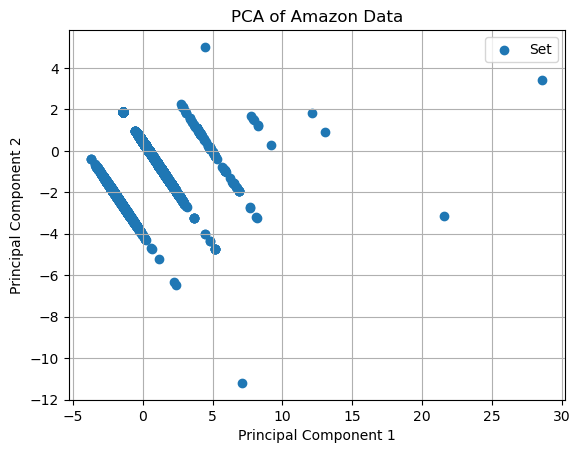

In [113]:
plt.scatter(df_pca[df_pca['Category'] == category]['pc1'], 
                df_pca[df_pca['Category'] == category]['pc2'], 
                label=category)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Amazon Data')
plt.legend()
plt.grid(True)
plt.show()